### Crop Disease Prediction
This model predicts which crop has what type of disease with the help of dataset available on kaggle.

In [38]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\tensorflow\python\client\session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [75]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [76]:
os.chdir('C:/Users/mohit/Downloads/Compressed/archive_6')
directory = os.getcwd()
directory

'C:\\Users\\mohit\\Downloads\\Compressed\\archive_6'

In [77]:
train_data = os.path.join('train/')
val_data = os.path.join('valid/')
test_data = os.path.join('test/')
new_data =  os.path.join('new/')
file = os.listdir(train_data)
print(file[:])

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',

### Tranfer Learning

In [78]:
mod = tf.keras.applications.InceptionV3(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [79]:
ip = mod.layers[0].input
op = mod.layers[-2].output
op

<KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'avg_pool')>

In [80]:
final_output=tf.keras.layers.Dense(128)(op)
final_output=tf.keras.layers.Activation('relu')(final_output)
final_output=tf.keras.layers.Dropout(0.2)(final_output)
final_output=tf.keras.layers.Dense(38,activation='softmax')(final_output)

final_output

<KerasTensor: shape=(None, 38) dtype=float32 (created by layer 'dense_3')>

In [81]:
model=tf.keras.Model(inputs =ip,outputs=final_output)

In [82]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [83]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             optimizer= 'Adam',
             metrics=['accuracy'])

### Augmentation

In [84]:
train_gen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    fill_mode='nearest'
)

train_data_gen = train_gen.flow_from_directory(train_data , 
                                              target_size = (299,299),
                                              batch_size=10,
                                              class_mode="categorical")

val_gen = ImageDataGenerator(rescale = 1/255)
val_data_gen = val_gen.flow_from_directory(val_data ,
                                             target_size = (299,299),
                                             batch_size = 10,
                                             class_mode = "categorical")


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [85]:
categories = train_data_gen.class_indices.keys()
key_list = list(train_data_gen.class_indices.keys())
val_list = list(train_data_gen.class_indices.values())
print(key_list)
print(val_list)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [86]:
model_fiting = model.fit(train_data_gen ,steps_per_epoch=1000,epochs=80,validation_data=val_data_gen, verbose=2 ,batch_size =10 )

Epoch 1/80


C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\keras\backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


1000/1000 - 292s - loss: 3.6338 - accuracy: 0.0312 - val_loss: 3.7449 - val_accuracy: 0.0331
Epoch 2/80
1000/1000 - 281s - loss: 3.4104 - accuracy: 0.0549 - val_loss: 3.2039 - val_accuracy: 0.0738
Epoch 3/80
1000/1000 - 281s - loss: 3.3238 - accuracy: 0.0664 - val_loss: 4.7677 - val_accuracy: 0.0487
Epoch 4/80
1000/1000 - 284s - loss: 3.3227 - accuracy: 0.0630 - val_loss: 3.3214 - val_accuracy: 0.0560
Epoch 5/80
1000/1000 - 281s - loss: 3.2534 - accuracy: 0.0785 - val_loss: 3.4312 - val_accuracy: 0.0730
Epoch 6/80
1000/1000 - 281s - loss: 3.1812 - accuracy: 0.0876 - val_loss: 3.0425 - val_accuracy: 0.1125
Epoch 7/80
1000/1000 - 288s - loss: 3.0343 - accuracy: 0.1072 - val_loss: 2.8909 - val_accuracy: 0.1455
Epoch 8/80
1000/1000 - 283s - loss: 2.8797 - accuracy: 0.1374 - val_loss: 3.2077 - val_accuracy: 0.1208
Epoch 9/80
1000/1000 - 282s - loss: 2.7828 - accuracy: 0.1563 - val_loss: 2.5475 - val_accuracy: 0.2214
Epoch 10/80
1000/1000 - 282s - loss: 2.5668 - accuracy: 0.2081 - val_loss: 

Epoch 80/80
1000/1000 - 281s - loss: 0.2238 - accuracy: 0.9320 - val_loss: 0.1285 - val_accuracy: 0.9606


In [13]:
model.save('8966_8960model.h5') # 1000stepepoch , 50epoch , lr=auto

### Evaluating the model

In [87]:
acc = model_fiting.history["accuracy"]
validation_acc = model_fiting.history["val_accuracy"]
print(acc)
print(validation_acc)

[0.031199999153614044, 0.05490000173449516, 0.06639999896287918, 0.06303151696920395, 0.07850000262260437, 0.08760000020265579, 0.10719999670982361, 0.13740000128746033, 0.15629999339580536, 0.20810000598430634, 0.2515999972820282, 0.29100000858306885, 0.3197999894618988, 0.36480000615119934, 0.41609999537467957, 0.4530999958515167, 0.5029000043869019, 0.5291000008583069, 0.5496000051498413, 0.5812000036239624, 0.609000027179718, 0.621399998664856, 0.6327000260353088, 0.6628999710083008, 0.66839998960495, 0.6834999918937683, 0.6865000128746033, 0.7179999947547913, 0.7330999970436096, 0.7420710325241089, 0.7480999827384949, 0.7560999989509583, 0.7760000228881836, 0.7746000289916992, 0.7785999774932861, 0.7931966185569763, 0.7979000210762024, 0.8131065368652344, 0.8112999796867371, 0.8185999989509583, 0.8259999752044678, 0.8378999829292297, 0.840399980545044, 0.8435999751091003, 0.843521773815155, 0.852400004863739, 0.8583999872207642, 0.8579999804496765, 0.8585000038146973, 0.8726000189

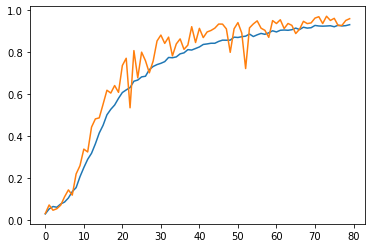

In [88]:
epochs=range(len(acc))
plt.plot(epochs ,acc )
plt.plot(epochs, validation_acc)
plt.show()

In [11]:
model = tf.keras.models.load_model('8966_8960model.h5')

In [90]:
model = model.save('9366_9660model.h5')

In [12]:
evalu = model.evaluate(val_data_gen)

C:\Users\mohit\anaconda3\envs\tf-gpu\lib\site-packages\keras\backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


1758/1758 [==============================] - 112s 60ms/step - loss: 0.3843 - accuracy: 0.8960


In [74]:
from tensorflow.keras.utils import load_img , img_to_array
uploading_file = os.listdir('test')

for fn in uploading_file:
  path = "C:/Users/mohit/Downloads/Compressed/archive_6/test/"+fn
  image = load_img(path , target_size=(299,299))
  x = img_to_array(image)
  x = x/225
  x = np.expand_dims(x , axis=0)

  images = np.vstack([x])
  pred_res = model.predict(images , batch_size=10)
  pred_res = np.argmax(pred_res[0])
  posi = val_list.index(pred_res)
  value = key_list[posi]
  print("Predicted :" +"\n" +value)
  print("--------------------->>>>>>>>>>>>>  Original :" +fn)
  

Predicted :
Apple___Cedar_apple_rust
--------------------->>>>>>>>>>>>>  Original :AppleCedarRust1.JPG
Predicted :
Apple___Cedar_apple_rust
--------------------->>>>>>>>>>>>>  Original :AppleCedarRust2.JPG
Predicted :
Apple___Cedar_apple_rust
--------------------->>>>>>>>>>>>>  Original :AppleCedarRust3.JPG
Predicted :
Apple___Cedar_apple_rust
--------------------->>>>>>>>>>>>>  Original :AppleCedarRust4.JPG
Predicted :
Apple___Apple_scab
--------------------->>>>>>>>>>>>>  Original :AppleScab1.JPG
Predicted :
Apple___Apple_scab
--------------------->>>>>>>>>>>>>  Original :AppleScab2.JPG
Predicted :
Potato___Early_blight
--------------------->>>>>>>>>>>>>  Original :AppleScab3.JPG
Predicted :
Corn_(maize)___Common_rust_
--------------------->>>>>>>>>>>>>  Original :CornCommonRust1.JPG
Predicted :
Corn_(maize)___Common_rust_
--------------------->>>>>>>>>>>>>  Original :CornCommonRust2.JPG
Predicted :
Corn_(maize)___Common_rust_
--------------------->>>>>>>>>>>>>  Original :CornCommonR

#### for Flask operation

In [46]:
from tensorflow.keras.utils import load_img , img_to_array
path = "C:/Users/mohit/Downloads/Compressed/archive_6/new/AppleCedarRust2.JPG"
image = load_img(path , target_size=(299,299))
x = img_to_array(image)
x = x.reshape(1,299,299,3)
x = x/255
res = model.predict(x)
print(np.argmax(res[0]))

2
